<a href="https://colab.research.google.com/github/HankRobot/Foundations-in-Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with python for ML; linear regression

This lab is to get you started with a few much used libraries in python for numerical computations and plotting that are essential in machine learning. You will learn how to perform linear regression on some simple datasets.

In [1]:
%matplotlib inline  
import numpy as np # numerical computation packages in python
import matplotlib.pyplot as plt # plotting routines
# plotting library

# Example: creating a function and plotting it

In [2]:
def f(x):
    return (x**2-4)*np.sin(2*x)
N=20
X=np.linspace(-3,3,N)
y = f(X)

By way of illustration, I've defined a function
f:Xwhere ∀x∈X,xy(x)→↦=Yy(x)∈Y(x2−4)sin(2x).
 
Here, the set  X  is a set of  N  equally spaced points between  −3  and  3 , implemented as a numpy array. f is applied to every member of the set, implemented as a pointwise evaluation of f on every element.

Increase N to see smoother curves.



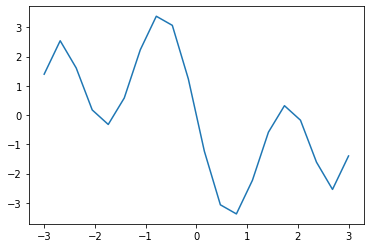

In [3]:
plt.plot(X,y)

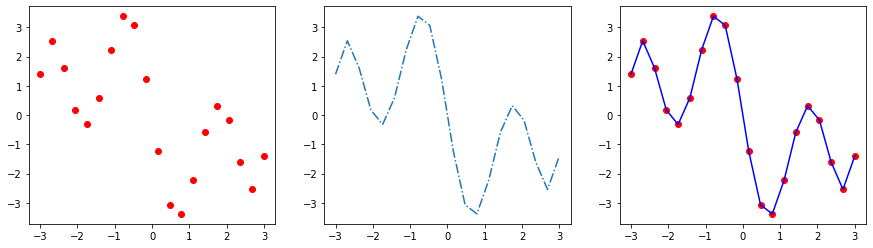

In [4]:
fig, axes = plt.subplots(figsize=(15,4),nrows=1, ncols=3,sharex='col') # look up matplotlib documentation
axes[0].scatter(X,y,c='r')
axes[1].plot(X,y, '-.')
axes[2].scatter(X,y,c='r')
axes[2].plot(X,y, c='b')

In [5]:
print(type(X), type(y)) 
print(np.shape(X), np.shape(y))
print(X) # Printing all values of X
print('The first 4 entries of X: ',X[:4])
print('From the 17th entry of y until the end: ', y[16:])
print('The last 3 entries of y: ',y[-3:])

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(20,) (20,)
[-3.         -2.68421053 -2.36842105 -2.05263158 -1.73684211 -1.42105263
 -1.10526316 -0.78947368 -0.47368421 -0.15789474  0.15789474  0.47368421
  0.78947368  1.10526316  1.42105263  1.73684211  2.05263158  2.36842105
  2.68421053  3.        ]
The first 4 entries of X:  [-3.         -2.68421053 -2.36842105 -2.05263158]
From the 17th entry of y until the end:  [-0.17517845 -1.60893713 -2.53969131 -1.39707749]
The last 3 entries of y:  [-1.60893713 -2.53969131 -1.39707749]


# Vector operations, vectorised code
You will see that encapsulating iterations in vector form is computationally beneficial in python/numpy because the underlying algorithms for manipulating arrays are performed in a performant language (Fortran/C), not python.

Dot product of two vectors is timed below -- one version using for loops, the other using a dot(v, w) call to numpy.

In [6]:
np.random.seed(5) # choose a random seed for pseudorandom number generator
dim = 1000 # the dimensionality of vectors to be introduced next
vectors = np.random.normal(0, 5.0,(2, dim)) # vectors is a 2-by-dim matrix, each row being a vector of size dim

In [7]:
np.shape(vectors)

(2, 1000)

In [8]:
def dot_for_loop(vecs):
    dotproduct = 0.
    dim = np.shape(vecs)[1]
    for j in range(dim):
        dotproduct += vecs[0][j]*vecs[1][j]
    return dotproduct   

def dot_no_loop(vecs):
    dim = np.shape(vecs)[1] 
    return np.dot(vecs[0], vecs[1])

In [9]:
print(dot_for_loop(vectors))
print(dot_no_loop(vectors))

707.73422771129
707.7342277112893


In [10]:
%%timeit 
dot_for_loop(vectors)

The slowest run took 5.15 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 841 µs per loop


In [11]:
%%timeit 
dot_no_loop(vectors)

The slowest run took 13.77 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.82 µs per loop


I hope you notice the difference in execution speed.

# Arrays in numpy
In machine learning, data is stored in arrays and fast array manipulation is essential. In the above example, you will have stored data in an array before plotting. This was done by calling a numpy routine. A comprehensive tutorial introduction can be found in many resources on the web. You might find this text (https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html) to be quite useful.

# Linear Regression
First, you will fit a straight line through the origin to "best fit" a tiny data set of 3 points. Set up the "ground truth" function from which a "training set" of 3 points will be sampled. The output will be noisy -- an additive noise term will be used to generate the data to learn from. For that you will use some of numpy/scipy's built-in random number generators.

In [12]:
def linear_simple(x):
    return -2.5*x
Xtrain1 = np.linspace(-1,1,3)
np.random.seed(10) 
# a seed ensures that re-running the random number generator yields the same outcome
# this is helpful for the purpose of sanity checking your implementations
n3 = np.random.normal(0,1.0,3)
ytrain1 = linear_simple(Xtrain1) + n3

x=  [-1.  0.  1.] y=  [ 3.8315865   0.71527897 -4.04540029] noise added=  [ 1.3315865   0.71527897 -1.54540029]


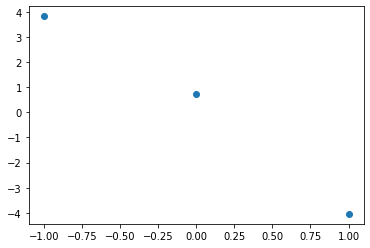

In [13]:
# Check to see what the data looks like 
print("x= ",Xtrain1,"y= ", ytrain1,"noise added= ", n3)
plt.scatter(Xtrain1,ytrain1)

Upon eyeballing the scatter plot you guess that the slope is negative, prompting you to postulate a functional form  y=−wx  to fit the data. You plot the  y  vs  x  plots for a few values of  w  below.

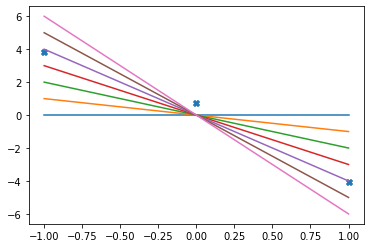

In [14]:
wlist = np.asarray([0.,-1.,-2.,-3.,-4.,-5.,-6.]) # choose 6 values for the slope
X = np.linspace(-1,1,50)
plt.scatter(Xtrain1,ytrain1,marker='X')
for i in range(len(wlist)):
    plt.plot(X,wlist[i]*X)

You will probably be thinking that surely there must be an intercept, i.e., the function should be of the form  y=−wx+b . Let's go with the simple case first. All these lines go through the origin and the middle point is displaced from the origin.

For the 6 straight lines ("model hypotheses") compute the deviations of the predicted values of y given an x drawn from Xtrain1 from the actual corresponding value from ytrain1.

In [15]:
# print the residuals for each of the six models
# Your turn: compare wrange below with wlist above, check types and values
wrange = np.linspace(-6,0,6) 
for w in wrange:
    print(w*Xtrain1-ytrain1)

[ 2.1684135  -0.71527897 -1.95459971]
[ 0.9684135  -0.71527897 -0.75459971]
[-0.2315865  -0.71527897  0.44540029]
[-1.4315865  -0.71527897  1.64540029]
[-2.6315865  -0.71527897  2.84540029]
[-3.8315865  -0.71527897  4.04540029]


The residuals are converted into a loss function -- each deviation contributes positively to the loss. One choice is a sum of squares of the residuals.

In [16]:
for w in wrange:
    print(np.sum((w*Xtrain1-ytrain1)**2))

9.034101118368394
2.0188694293462808
0.7636377403241693
5.268406051302055
15.533174362279944
31.557942673257834


For a normalised loss function whose values can be compared across data sets of different sizes, the average of the sum of squares is taken. In order to have a scale of the average deviations relative to the magnitudes of the predicted values, a square-root is taken. This is called the root-mean-squared-error or rmse.

In [17]:
def mse(w, x, y):
    return np.mean((np.multiply(w,x)-y)**2)
def l1e(w, x, y):
    return np.mean(np.abs(np.multiply(w,x)-y))

print("Mean squared errors:")
for w in wrange:
    print(mse(w, Xtrain1,ytrain1)) 

print("Absolute value of residuals:")    
for w in wrange:
    print(l1e(w, Xtrain1,ytrain1))

Mean squared errors:
3.011367039456131
0.6729564764487602
0.25454591344138977
1.7561353504340182
5.177724787426648
10.519314224419277
Absolute value of residuals:
1.6127640593858732
0.8127640593858728
0.46408859021306403
1.2640885902130639
2.064088590213064
2.8640885902130635


### Plotting the loss function for a 1-dimensional unknown weight
It is very helpful to view the loss function graphically. The idea of the shape of a loss function of a model's unknown parameters is fundamental to machine learning. 

Note that the entire gradient of loss function is plotted out, and this might seem simple but is very computationally expensive for complex signals.

In [18]:
# We had defined the mse/rmse function for a single value of the unknown slope w.  
# Here we define it to take an array of w values as input
def ar_mse(w, x, y):  
    return np.array([mse(wi,x,y) for wi in w])
def ar_rmse(w, x, y):  
    return np.array([rmse(wi,x,y) for wi in w])
def ar_l1e(w, x, y):  
    return np.array([l1e(wi,x,y) for wi in w])

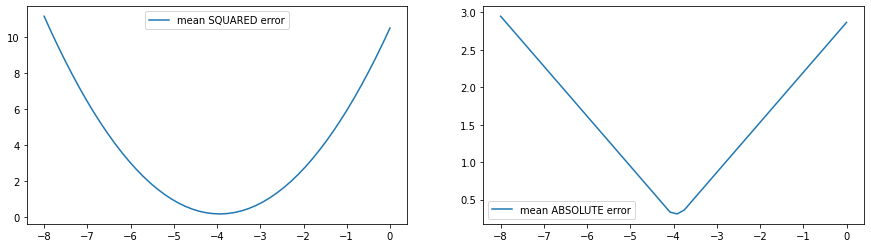

In [19]:
wlims = np.linspace(-8,0,50) # Generate 50 slope values for the straight line models
fig, ax = plt.subplots(figsize=(15,4), nrows=1, ncols=2)
ax[0].plot(wlims,ar_mse(wlims,Xtrain1, ytrain1), label='mean SQUARED error')
ax[0].legend()
ax[1].plot(wlims,ar_l1e(wlims,Xtrain1, ytrain1), label='mean ABSOLUTE error')
ax[1].legend()

To find the best fiting line, invoke the function argmin. Your turn: find the definition of argmin and argmax on the web.

In [20]:
wbest, least_error = (wlims[np.argmin(ar_mse(wlims,Xtrain1, ytrain1))],np.min(ar_mse(wlims,Xtrain1, ytrain1)))
wbest2, least_error2 = (wlims[np.argmin(ar_l1e(wlims,Xtrain1, ytrain1))],np.min(ar_l1e(wlims,Xtrain1, ytrain1)))
print(wbest, least_error) # the best-fit value and the corresponding error 
print(wbest2, least_error2) # the best-fit value and the corresponding error 

-3.9183673469387754 0.1784307650181058
-3.9183673469387754 0.3096975874600519


### Your turn
Should the values for wbest and least_error be the same if the rmse loss is evaluated, not the mse loss function?

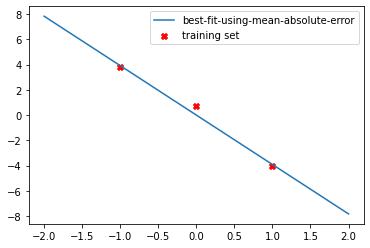

In [21]:
X = np.linspace(-2,2,50)
plt.plot(X,wbest2*X, label='best-fit-using-mean-absolute-error')
plt.scatter(Xtrain1,ytrain1,c='r',marker='X', label='training set')
plt.legend()

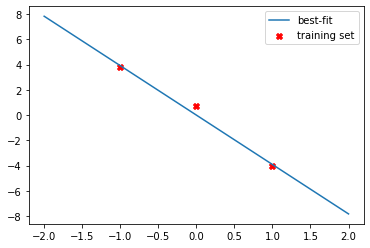

In [22]:
X = np.linspace(-2,2,50)
plt.plot(X,wbest*X, label='best-fit')
plt.scatter(Xtrain1,ytrain1,c='r',marker='X', label='training set')
plt.legend()

Note: The function used to generate the points had a slope of -2.5, but what is the slope of the best-fit line? Compare the two lines.

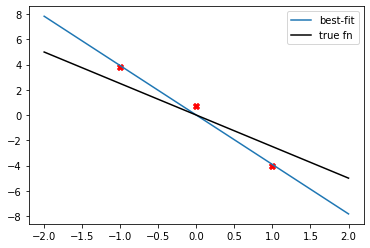

In [23]:
X = np.linspace(-2,2,50)
plt.plot(X,wbest*X, label='best-fit')  # Best fit line
plt.plot(X,-2.5*X,  c='k', label='true fn') # Noise-free line from which data was generated
plt.scatter(Xtrain1,ytrain1,c='r',marker='X')# data points
plt.legend()

In [24]:
npts = 10
Xtrain2 = np.linspace(-1,1,npts)
noise = np.random.normal(0,1.0,npts)
ytrain2 = linear_simple(Xtrain2) + noise  # generate some more points from the same function

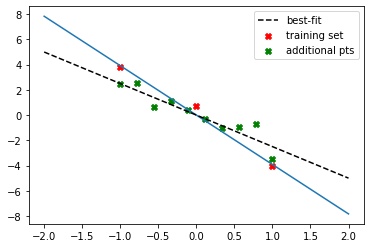

In [25]:
X = np.linspace(-2,2,10)
plt.plot(X,wbest*X)
plt.plot(X,-2.5*X, '--', c='k', label='best-fit')
plt.scatter(Xtrain1,ytrain1,c='r',marker='X', label='training set')
plt.scatter(Xtrain2,ytrain2,c='g',marker='X', label='additional pts')
plt.legend()

With 10 more data points generated, it looks as though the "true" function is a better fit than what we found with 3 points. How will you check?

### Your turn
Find the best fit line to the 10 data points (Xtrain2, ytrain2) and compare.



In [26]:
wbest, least_error = (wlims[np.argmin(ar_mse(wlims,Xtrain2, ytrain2))],np.min(ar_mse(wlims,Xtrain2, ytrain2)))
print(wbest,least_error)

-2.4489795918367347 0.35964387436304857


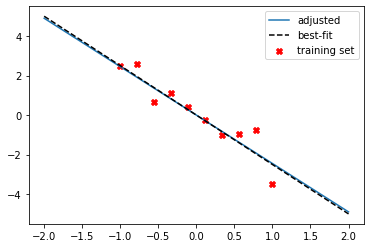

In [27]:
X = np.linspace(-2,2,10)
plt.plot(X,wbest*X, label='adjusted')
plt.plot(X,-2.5*X, '--', c='k', label='best-fit')
plt.scatter(Xtrain2,ytrain2,c='r',marker='X', label='training set')
plt.legend()

## Gradient descent
Suppose you randomly chose a certain value of  w  to fit the data, say  w=−5.0 . You find a non-zero value for the loss. Now you would like to choose a value that reduces the loss, and in particular, find one that minimises the loss. Let's do this sequentially.

In [28]:
npts = 20
Xtrain3 = np.linspace(-1,1,npts)
noise = np.random.normal(0,1.0,npts)
ytrain3 = linear_simple(Xtrain3) + noise

Text(0.5, 1.0, 'Mean square loss function')

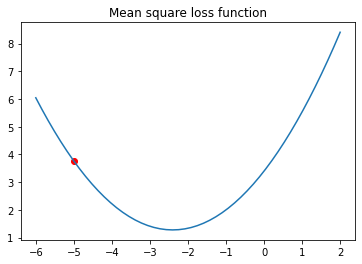

In [29]:
wlims = np.linspace(-6,2,50) # Generate 50 slope values for the straight line models
plt.plot(wlims,ar_mse(wlims, Xtrain3, ytrain3))
plt.scatter([-5.],ar_mse([-5.],Xtrain3, ytrain3),c='r')
plt.title("Mean square loss function")

The derivative of the mse loss function with respect to  w1  is:
∂L∂w1=1N∑n∂∂w1(w1xn−yn)2=2N∑nxn(w1xn−yn)=2N(w1x⊤x−x⊤y),
 
where each data point in the training set is denoted  (xn,yn) , with  n=1,…,N . Note, we express the sum over all data points as a dot product.

In [30]:
def loss_slope_w1(w1, Xtrain, ytrain):
    return (2/len(Xtrain))*(np.dot(w1*Xtrain - ytrain, Xtrain))

In [31]:
print("slope of loss fn = ",loss_slope_w1( -5.0, Xtrain3, ytrain3), \
      ", mse loss fn = ", mse(-5., Xtrain3, ytrain3))

slope of loss fn =  -1.9147124508570401 , mse loss fn =  3.7622654200161243


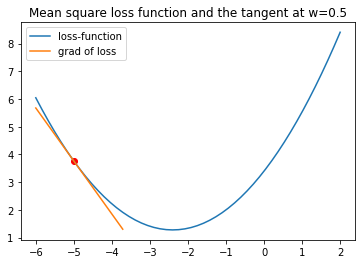

In [32]:
wlims = np.linspace(-6,2,50) # Generate 50 slope values for the straight line models
plt.plot(wlims,ar_mse(wlims, Xtrain3, ytrain3), label='loss-function')
plt.scatter([-5.],ar_mse([-5.],Xtrain3, ytrain3),c='r')
gw = loss_slope_w1(-5.0, Xtrain3, ytrain3)
loss = mse(-5., Xtrain3, ytrain3)
plt.plot(wlims[:15],gw*(wlims[:15]+5.) + loss, label='grad of loss') # plotting the slope using the first few values of w (prettifying )
plt.title('Mean square loss function and the tangent at w=0.5')
plt.legend()

For linear regression, the derivatives with respect to  w0  and  w1  can be set to zero to find closed form expressions for their optimal values for a straight line fit to the data points. For more complicated dependence of the loss function on the unknown parameters of the model you might want to fit, it may not be possible to find a formula for the point where the gradients vanish. In that case, you would have to find some iterative scheme to the minimisation of the loss -- at each iteration, reduce the loss until the reduction is not worth waiting for.

The function gradientdescent0 runs through a number of iterations of taking steps in a direction opposite to the slope (gradient) in order to reduce the loss. The step size is called the learning rate. The output for 3 executions is shown in the cell below. Make sure you understand what the function is doing.



In [33]:
def gradientdescent0(initialweight, X, y, rate, numiter):
    whistory = []
    msehistory = [] 
    w = initialweight
    for i in range(numiter): 
        loss = mse(w, X, y)
        whistory.append(w)
        msehistory.append(loss)
        grad = loss_slope_w1(w, X, y)
        w = w - rate*grad  # go a certain distance opposite to the slope (downward) 
    return w, np.asarray(whistory), np.asarray(msehistory)

In [34]:
print('numiter = 1:\n', gradientdescent0(-5., Xtrain3, ytrain3, .2, 1))
print('numiter = 2:\n', gradientdescent0(-5., Xtrain3, ytrain3, .2, 2))
print('numiter = 3:\n', gradientdescent0(-5., Xtrain3, ytrain3, .2, 3))

numiter = 1:
 (-4.617057509828592, array([-5.]), array([3.76226542]))
numiter = 2:
 (-4.2905486497877074, array([-5.        , -4.61705751]), array([3.76226542, 3.08306775]))
numiter = 3:
 (-4.012156884910742, array([-5.        , -4.61705751, -4.29054865]), array([3.76226542, 3.08306775, 2.58930422]))


## Your turn
Look at what the function gradientdescent0 returns; it is a tuple. Elements of a tuple T can be accessed as T[0], T[1], etc. Pull out the msehistory from the output of gradientdescent0 and
plot the loss function as a function of the number of interations. Change the learning rate to gain intuition about its effect on the learning dynamics. You can also plot different straight line fits to the data at various stages.

Closed form solution to the slope and intercept
wˆ1=x⋅y¯¯¯¯¯¯¯¯¯−x¯¯¯⋅y¯¯¯x2¯¯¯¯¯−x¯¯¯2.
 
The  ⋅¯  notation represents sample averages:  z¯¯¯=1N∑Nn=1zn. 
The expression can be derived by setting
0=∂L∂wi=1N∑n∂∂wi(w0+w1xn−yn)2, for i=0,1.
 
Notation: Equation (1.10) in FCML gives a closed-form expression for the best-fit slope for a general linear regression problem with  x  for inputs and  t  for outputs ("targets").

The intercept is given by
wˆ0=y¯¯¯−w1x¯¯¯.
 
Interpret the result geometrically.

In [35]:
print('numiter = 3:\n', gradientdescent0(-5., Xtrain3, ytrain3, .2, 3))
print('numiter = 3:\n', gradientdescent0(-5., Xtrain3, ytrain3, .2, 3)[1][0])
test = gradientdescent0(-5., Xtrain3, ytrain3, .2, 20)[1]

numiter = 3:
 (-4.012156884910742, array([-5.        , -4.61705751, -4.29054865]), array([3.76226542, 3.08306775, 2.58930422]))
numiter = 3:
 -5.0


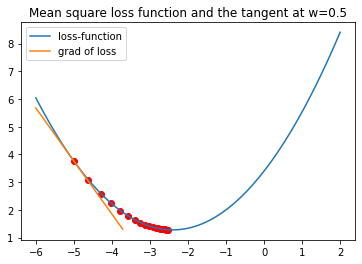

In [36]:
##### wlims = np.linspace(-6,2,50) # Generate 50 slope values for the straight line models
plt.plot(wlims,ar_mse(wlims, Xtrain3, ytrain3), label='loss-function')
plt.scatter(test,ar_mse(test,Xtrain3, ytrain3),c='r')
gw = loss_slope_w1(-5, Xtrain3, ytrain3)
loss = mse(-5., Xtrain3, ytrain3)
plt.plot(wlims[:15],gw*(wlims[:15]+5.) + loss, label='grad of loss') # plotting the slope using the first few values of w (prettifying )
plt.title('Mean square loss function and the tangent at w=0.5')
plt.legend()

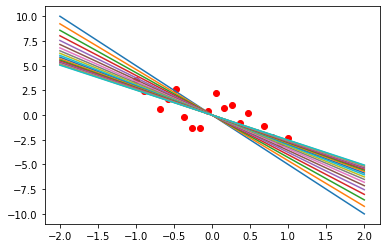

In [37]:
plt.scatter(Xtrain3,ytrain3,c='r')
for i in range(len(test)):
    plt.plot(X,test[i]*X)

-2.5271213640944277


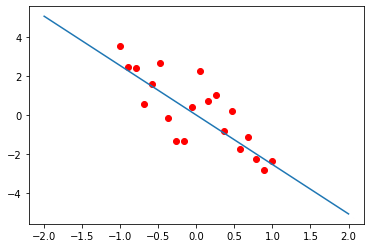

In [38]:
#Best result
plt.scatter(Xtrain3,ytrain3,c='r')
plt.plot(X,test[-1]*X)
print(test[-1])

In [39]:
def linear_fit(X,y):
    num = (X*y).mean() - (X.mean()*y.mean())
    den = (X**2).mean() - (X.mean())**2
    w1 = num/den
    w0 = y.mean() - w1*X.mean()
    return w0, w1

-2.4014616738368737


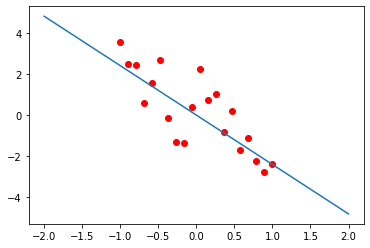

In [40]:
#Method 2
plt.scatter(Xtrain3,ytrain3,c='r')
plt.plot(X,linear_fit(Xtrain3,ytrain3)[1]*X)
print(linear_fit(Xtrain3,ytrain3)[1])

## Your turn
Verify that this gives the same result as what you found earlier.

## Your turn: 100m datasets
Perform linear regression on the 100m datasets following FCML and compare with the results they get. You can perform your own exploration on the data to query the nature of the model you have learnt.

In [49]:
# men's 100m sprint times
olympics100m = np.asarray([1900,11,
1904,11,
1906,11.2,
1908,10.8,
1912,10.8,
1920,10.8,
1924,10.6,
1928,10.8,
1932,10.3,
1936,10.3,
1948,10.3,
1952,10.4,
1956,10.5,
1960,10.2,
1964,10,
1968,9.95,
1972,10.14,
1976,10.06,
1980,10.25,
1984,9.99,
1988,9.92,
1992,9.96,
1996,9.84,
2000,9.87,
2004,9.85,
2008,9.69,
2012,9.63,
2016,9.81]);

# women's 100m sprint times
olympics100f=np.asarray([
1948, 11.90,
1952, 11.50,
1956, 11.50,
1960, 11.00,
1964, 11.40,
1968, 11.08,
1972, 11.07,
1976, 11.08,
1980, 11.06,
1984, 10.97,
1988, 10.54,
1992, 10.82,
1996, 10.94,
2000, 10.75,
2004, 10.93,
2008, 10.78,
2012, 10.75,
2016, 10.71])

In a paper (Limits to running speed in dogs, horses and humans, by Mark W. Denny Journal of Experimental Biology 2008 https://jeb.biologists.org/content/211/24/3836.abstract) a model of speed records over time is developed from a probabilistic model of extreme value statistics. We will build simple polynomial regression models following the first chapter of the Rogers-Girolami book later, but here this example function is used to get familiar with working with the plotting libraries.

In [50]:
def denny_logistic_m(year): 
    (mn, mx, tof, k) = (9.44, 10.3, 1972, .063) # denny  10.330 (10.165 10.495) 9.439 0.063 1971.65
    speed = 3.6*(mn + (mx - mn)/(1 + np.exp(-k*(year - tof))))
    return speed
def denny_logistic_f(year): # denny 9.297 (9.222 9.373) 8.277 0.109 1963.27
    (mn, mx, tof, k) = (8.28, 9.3, 1963, .11) # denny 9.439
    speed = 3.6*(mn + (mx - mn)/(1 + np.exp(-k*(year - tof))))
    return speed

[Text(0.5, 1.0, 'speed of Olympics sprinters')]

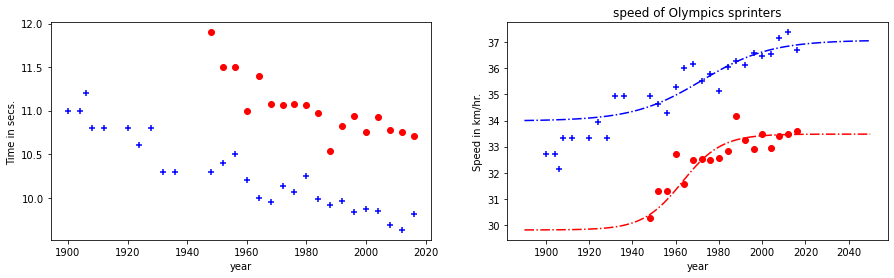

In [51]:
odate_m = olympics100m[::2]
odate_f = olympics100f[::2]
taxis = np.linspace(1890, 2050, 100)
otime_m = olympics100m[1::2]
otime_f = olympics100f[1::2]
fig, ax = plt.subplots(figsize=(15,4),nrows=1, ncols=2)
ax[0].scatter(odate_m, otime_m, c='b', marker = '+')
ax[0].scatter(odate_f, otime_f, c='r', marker = 'o')
ax[0].set(xlabel="year", ylabel="Time in secs.")
ax[1].scatter(odate_m, (360/otime_m),c='b', marker ='+')
ax[1].scatter(odate_f, (360/otime_f),c='r', marker ='o')
ax[1].plot(taxis, denny_logistic_m(taxis), c='b', ls = "-.")
ax[1].plot(taxis, denny_logistic_f(taxis), c='r', ls = "-.")
ax[1].set(xlabel="year", ylabel="Speed in km/hr.")
ax[1].set(title = "speed of Olympics sprinters")

The first chapter of FCML will guide you through the mathematics of linear regression, a simple, but powerful machine learning method, using this data on 100m finish times. For your amusement, you could look at https://callingbullshit.org/case_studies/case_study_gender_gap_running.html on the misuse of linear regression in this context.

[Text(0.5, 1.0, 'speed of Olympics sprinters')]

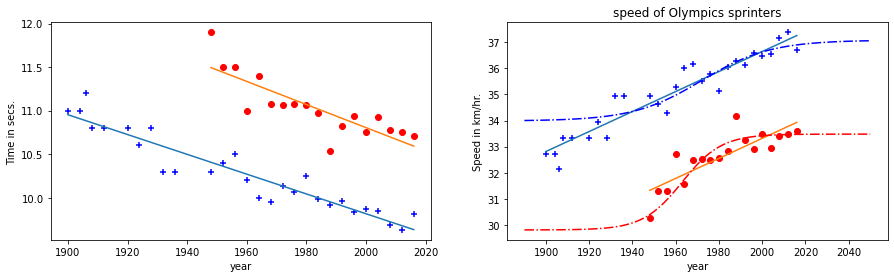

In [52]:
fig, ax = plt.subplots(figsize=(15,4),nrows=1, ncols=2)
ax[0].scatter(odate_m, otime_m, c='b', marker = '+')
ax[0].scatter(odate_f, otime_f, c='r', marker = 'o')
ax[0].set(xlabel="year", ylabel="Time in secs.")
ax[0].plot(odate_m,linear_fit(odate_m,otime_m)[1]*odate_m + linear_fit(odate_m,otime_m)[0])
print()
ax[0].plot(odate_f,linear_fit(odate_f,otime_f)[1]*odate_f + linear_fit(odate_f,otime_f)[0])
ax[1].scatter(odate_m, (360/otime_m),c='b', marker ='+')
ax[1].scatter(odate_f, (360/otime_f),c='r', marker ='o')
ax[1].plot(odate_m,linear_fit(odate_m,360/otime_m)[1]*odate_m + linear_fit(odate_m,360/otime_m)[0])
ax[1].plot(odate_f,linear_fit(odate_f,360/otime_f)[1]*odate_f + linear_fit(odate_f,360/otime_f)[0])
ax[1].plot(taxis, denny_logistic_m(taxis), c='b', ls = "-.")
ax[1].plot(taxis, denny_logistic_f(taxis), c='r', ls = "-.")
ax[1].set(xlabel="year", ylabel="Speed in km/hr.")
ax[1].set(title = "speed of Olympics sprinters")